In [16]:
import random
import numpy as np
from pylab import mpl, plt

style = 'seaborn-v0_8'
plt.style.use(style)
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

Calculate random points in range $(-1,1)$


In [17]:
rn = [(random.random() * 2 - 1, random.random() * 2 - 1) for _ in range(500)]
rn = np.array(rn)
rn[:3]

array([[-0.99941025,  0.73275749],
       [-0.25380521,  0.51193045],
       [-0.91107236,  0.21194368]])

Plot random points aswell as the unit circle


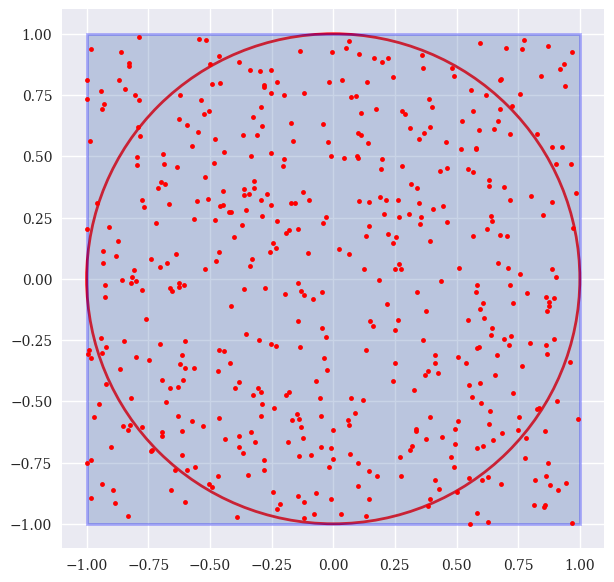

In [18]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(1, 1, 1)

circ = plt.Circle((0, 0), radius=1, edgecolor='r', lw=2.0, facecolor='none')
box = plt.Rectangle((-1, -1), 2, 2, edgecolor='b', lw=2, alpha=0.3, )

ax.add_patch(circ)
ax.add_patch(box)
plt.plot(rn[:, 0], rn[:, 1], 'r.')

plt.ylim(-1.1, 1.1)
plt.xlim(-1.1, 1.1)
plt.show()

### Pure Python 

In [19]:
n = int(1e8)

In [20]:
def mcs_pi_py(n):
    circle = 0
    for _ in range(n):
        x,y  = random.random(), random.random()
        if (x**2 + y**2) ** 0.5 <= 1:
            circle+=1
        
    return (4* circle) / n 
            

In [21]:
%time mcs_pi_py(n)

CPU times: total: 4.56 s
Wall time: 23.9 s


3.14153132

### NumPy 

In [22]:
def mcs_pi_np(n):
    rn = np.random.random((n,2)) * 2 - 1
    distance = np.sqrt((rn ** 2).sum(axis = 1))
    frac = (distance <= 1.0).sum() / len(distance)
    return frac * 4

In [23]:
%time mcs_pi_np(n)

CPU times: total: 422 ms
Wall time: 2.82 s


3.14180392

## Numba


In [24]:
import numba as nb

In [25]:
mcs_pi_nb = nb.jit(mcs_pi_py)

In [26]:
%time mcs_pi_nb(n)

CPU times: total: 93.8 ms
Wall time: 734 ms


3.14142068

### Cython


In [27]:
%load_ext Cython

The Cython extension is already loaded. To reload it, use:
  %reload_ext Cython


In [28]:
%%cython -a
from libc.stdlib cimport rand, RAND_MAX

def mcs_pi_cy(int n):
    cdef int i, circle = 0
    cdef float x, y
    for i in range(n):
        x = float(rand()) / RAND_MAX
        y = float(rand()) / RAND_MAX
        if x**2 + y**2 <= 1:
            circle += 1
        # Uncomment the next line to debug output in a test environment
        # print(f"x: {x}, y: {y}, inside: {x**2 + y**2 <= 1}")
    return 4.0 * circle / n


In [31]:
%time mcs_pi_cy(n)

CPU times: total: 688 ms
Wall time: 2.42 s


3.14131836